In [19]:
import stim

In [20]:
qubit_coords={(1,0):0,(2,0):1,(3,0):2,(1,1):3,(2,1):4,(0,2):5,(1,2):6,(2,2):7,(0,3):8,(1,3):9, (2,3):10}
blue_X_pair=[(0,3), (1,4), (5,6), (8,9)]
green_Z_pair=[(3,4), (6,9), (7,10), (5,8)]
red_X_pair=[(1,2), (4,7), (9,10), (3,6)]
blue_Z_pair=[(0,3), (1,4), (5,6), (2,7)]

In [21]:
import stim

# 回路の初期化
def initialize_circuit():
    return stim.Circuit()

# キュービットの座標とインデックスの定義
def define_qubit_coords():
    return {
        0: (2, 0), 1: (4, 0), 2: (6, 0),
        3: (2, 2), 4: (4, 2),
        5: (0, 4), 6: (2, 4), 7: (4, 4),
        8: (0, 6), 9: (2, 6), 10: (4, 6),
        11: (3, 0), 12: (5, 0), 13: (1, 2), 14: (3, 2), 15: (5, 2),
        16: (1, 4), 17: (3, 4), 18: (5, 4), 19: (-1, 6), 20: (3, 6), 21: (1, 6),
        22: (2, 1), 23: (4, 1), 24: (2, 3), 25: (4, 3), 26: (2, 5), 27: (4, 5),
        28: (0, 5)
    }

# QUBIT_COORDS命令の追加
def append_qubit_coords(circuit, qubit_coords):
    for qubit, (x, y) in qubit_coords.items():
        circuit.append("QUBIT_COORDS", [qubit], [x, y])

# すべてのデータキュービットをリセット
def reset_data_qubits(circuit, data_qubits):
    for qubit in data_qubits:
        circuit.append("R", [qubit])

# CNOTゲートを適用
def apply_cnot_gates(circuit, ancilla_pairs):
    for control, target in ancilla_pairs:
        circuit.append("CNOT", [control, target])
    circuit.append("TICK")

# blue_X_pairに対する操作（CNOTを逆に）
def apply_blue_X_stabilizers(circuit, pairs, qubit_coords, qubit_indices, mode=0):
    ancilla_pairs = []
    measured_ancillas = []
    for target1, target2 in pairs:
        ancilla_x = (qubit_coords[target1][0] + qubit_coords[target2][0]) / 2
        ancilla_y = (qubit_coords[target1][1] + qubit_coords[target2][1]) / 2
        ancilla = qubit_indices.get((ancilla_x, ancilla_y))
        if ancilla is not None:
            ancilla_pairs.append((target1, ancilla))
            ancilla_pairs.append((target2, ancilla))
            measured_ancillas.append(ancilla)
    if ancilla_pairs:
        apply_cnot_gates(circuit, ancilla_pairs)
    if measured_ancillas:
        circuit.append("MR", measured_ancillas)
        circuit.append("TICK")
    if mode == 0:
        add_blue_X_detectors_0(circuit, pairs, qubit_coords)
    elif mode == 1:
        add_blue_X_detectors_1(circuit, pairs, qubit_coords)

# green_Z_pairに対する操作（CZをHとCNOTで実装）
def apply_green_Z_stabilizers(circuit, pairs, qubit_coords, qubit_indices, mode=0):
    ancilla_pairs = []
    measured_ancillas = []
    for target1, target2 in pairs:
        ancilla_x = (qubit_coords[target1][0] + qubit_coords[target2][0]) / 2
        ancilla_y = (qubit_coords[target1][1] + qubit_coords[target2][1]) / 2
        ancilla = qubit_indices.get((ancilla_x, ancilla_y))
        if ancilla is not None:
            measured_ancillas.append(ancilla)
    if measured_ancillas:
        circuit.append("H", measured_ancillas)
        circuit.append("TICK")
    for target1, target2 in pairs:
        ancilla_x = (qubit_coords[target1][0] + qubit_coords[target2][0]) / 2
        ancilla_y = (qubit_coords[target1][1] + qubit_coords[target2][1]) / 2
        ancilla = qubit_indices.get((ancilla_x, ancilla_y))
        if ancilla is not None:
            ancilla_pairs.append((ancilla, target2))
            ancilla_pairs.append((ancilla, target1))
    if ancilla_pairs:
        apply_cnot_gates(circuit, ancilla_pairs)
    if measured_ancillas:
        circuit.append("H", measured_ancillas)
        circuit.append("TICK")
        circuit.append("MR", measured_ancillas)
        circuit.append("TICK")
    if mode == 0:
        add_green_z_detectors_0(circuit, pairs, qubit_coords)
    elif mode == 1:
        add_green_z_detectors_1(circuit, pairs, qubit_coords)
    elif mode == 2:
        add_green_z_detectors_2(circuit, pairs, qubit_coords)

# red_X_pairに対する操作（CNOTを逆に）
def apply_red_X_stabilizers(circuit, pairs, qubit_coords, qubit_indices, mode=0):
    ancilla_pairs = []
    measured_ancillas = []
    for target1, target2 in pairs:
        ancilla_x = (qubit_coords[target1][0] + qubit_coords[target2][0]) / 2
        ancilla_y = (qubit_coords[target1][1] + qubit_coords[target2][1]) / 2
        ancilla = qubit_indices.get((ancilla_x, ancilla_y))
        if ancilla is not None:
            ancilla_pairs.append((target1, ancilla))
            ancilla_pairs.append((target2, ancilla))
            measured_ancillas.append(ancilla)
    if ancilla_pairs:
        apply_cnot_gates(circuit, ancilla_pairs)
    if measured_ancillas:
        circuit.append("MR", measured_ancillas)
        circuit.append("TICK")
    if mode == 0:
        add_red_X_detectors_0(circuit, pairs, qubit_coords)
    elif mode == 1:
        add_red_X_detectors_1(circuit, pairs, qubit_coords)
    elif mode == 2:
        add_red_X_detectors_2(circuit, pairs, qubit_coords)

# blue_Z_pairに対する操作（CZをHとCNOTで実装）
def apply_blue_Z_stabilizers(circuit, pairs, qubit_coords, qubit_indices):
    ancilla_pairs = []
    measured_ancillas = []
    for target1, target2 in pairs:
        ancilla_x = (qubit_coords[target1][0] + qubit_coords[target2][0]) / 2
        ancilla_y = (qubit_coords[target1][1] + qubit_coords[target2][1]) / 2
        ancilla = qubit_indices.get((ancilla_x, ancilla_y))
        if ancilla is not None:
            measured_ancillas.append(ancilla)
    if measured_ancillas:
        circuit.append("H", measured_ancillas)
        circuit.append("TICK")
    for target1, target2 in pairs:
        ancilla_x = (qubit_coords[target1][0] + qubit_coords[target2][0]) / 2
        ancilla_y = (qubit_coords[target1][1] + qubit_coords[target2][1]) / 2
        ancilla = qubit_indices.get((ancilla_x, ancilla_y))
        if ancilla is not None:
            ancilla_pairs.append((ancilla, target2))
            ancilla_pairs.append((ancilla, target1))
    if ancilla_pairs:
        apply_cnot_gates(circuit, ancilla_pairs)
    if measured_ancillas:
        circuit.append("H", measured_ancillas)
        circuit.append("TICK")
        circuit.append("MR", measured_ancillas)
        circuit.append("TICK")
    add_blue_Z_detectors(circuit, pairs, qubit_coords)

# blue_Xペアに対する測定結果のディテクター追加
def add_blue_X_detectors_0(circuit, pairs, qubit_coords):
    for i, _ in enumerate(pairs):
        circuit.append("DETECTOR", [stim.target_rec(-1 - i)])

def add_blue_X_detectors_1(circuit, pairs, qubit_coords):
    for i, _ in enumerate(pairs):
        circuit.append("DETECTOR", [stim.target_rec(-1 - i)])

    circuit.append("DETECTOR", [stim.target_rec(-10), stim.target_rec(-9), stim.target_rec(-11)], (3, 4))
    circuit.append("DETECTOR", [stim.target_rec(-15), stim.target_rec(-13)], (5, 2))
    circuit.append("DETECTOR", [stim.target_rec(-16), stim.target_rec(-14)], (1, 2))
    circuit.append("DETECTOR", [stim.target_rec(-12)], (5, 0))
    circuit.append("DETECTOR", [stim.target_rec(-7), stim.target_rec(-5)], (1,6))
    circuit.append("DETECTOR", [stim.target_rec(-6)], (4,5))


# blue_Zペアに対する測定結果のディテクター追加
def add_blue_Z_detectors(circuit, pairs, qubit_coords):
    for i, _ in enumerate(pairs):
        circuit.append("DETECTOR", [stim.target_rec(-1 - i)])

    circuit.append("DETECTOR", [stim.target_rec(-12), stim.target_rec(-11), stim.target_rec(-10)], (3, 4))
    circuit.append("DETECTOR", [stim.target_rec(-14), stim.target_rec(-3)], (1, 6))
    circuit.append("DETECTOR", [stim.target_rec(-16), stim.target_rec(-15)], (3, 0))
    circuit.append("DETECTOR", [stim.target_rec(-9)], (0, 5))
    circuit.append("DETECTOR", [stim.target_rec(-6)], (3, 6))
    circuit.append("DETECTOR", [stim.target_rec(-8), stim.target_rec(-7)], (5, 2))

# green_Zペアに対する測定結果のディテクター追加
def add_green_z_detectors_0(circuit, pairs, qubit_coords):
    for i, _ in enumerate(pairs):
        circuit.append("DETECTOR", [stim.target_rec(-1 - i)])

    circuit.append("DETECTOR", [stim.target_rec(-8), stim.target_rec(-7)], (3, 0))
    circuit.append("DETECTOR", [stim.target_rec(-6), stim.target_rec(-5)], (1, 6))

def add_green_z_detectors_1(circuit, pairs, qubit_coords):
    for i, _ in enumerate(pairs):
        circuit.append("DETECTOR", [stim.target_rec(-1 - i)])

    circuit.append("DETECTOR", [stim.target_rec(-22), stim.target_rec(-21)], (1, 6))
    circuit.append("DETECTOR", [stim.target_rec(-24), stim.target_rec(-23)], (3, 0))
    circuit.append("DETECTOR", [stim.target_rec(-11), stim.target_rec(-9)], (5, 2))
    circuit.append("DETECTOR", [stim.target_rec(-12), stim.target_rec(-10)], (1, 2))
    circuit.append("DETECTOR", [stim.target_rec(-6), stim.target_rec(-5), stim.target_rec(-7)], (3, 4))
    circuit.append("DETECTOR", [stim.target_rec(-8)], (5, 0))

def add_green_z_detectors_2(circuit, pairs, qubit_coords):
    for i, _ in enumerate(pairs):
        circuit.append("DETECTOR", [stim.target_rec(-1 - i)])

    circuit.append("DETECTOR", [stim.target_rec(-14), stim.target_rec(-13), stim.target_rec(-15)], (3, 4))
    circuit.append("DETECTOR", [stim.target_rec(-19), stim.target_rec(-17)], (5, 2))
    circuit.append("DETECTOR", [stim.target_rec(-20), stim.target_rec(-18)], (1, 2))
    circuit.append("DETECTOR", [stim.target_rec(-16)], (5, 0))
    circuit.append("DETECTOR", [stim.target_rec(-6), stim.target_rec(-5)], (1, 6))
    circuit.append("DETECTOR", [stim.target_rec(-7), stim.target_rec(-8)], (3, 0))
    


# red_Xペアに対する測定結果のディテクター追加
def add_red_X_detectors_0(circuit, pairs, qubit_coords):
    for i, _ in enumerate(pairs):
        circuit.append("DETECTOR", [stim.target_rec(-1 - i)])

    circuit.append("DETECTOR", [stim.target_rec(-12), stim.target_rec(-11)], (3, 0))
    circuit.append("DETECTOR", [stim.target_rec(-10), stim.target_rec(-9)], (1, 6))
    circuit.append("DETECTOR", [stim.target_rec(-5)], (0, 5))
    circuit.append("DETECTOR", [stim.target_rec(-8), stim.target_rec(-7), stim.target_rec(-6)], (3, 4))

def add_red_X_detectors_1(circuit, pairs, qubit_coords):
    for i, _ in enumerate(pairs):
        circuit.append("DETECTOR", [stim.target_rec(-1 - i)])

    circuit.append("DETECTOR", [stim.target_rec(-16), stim.target_rec(-15), stim.target_rec(-14)], (3, 4))
    circuit.append("DETECTOR", [stim.target_rec(-18), stim.target_rec(-17)], (1, 6))
    circuit.append("DETECTOR", [stim.target_rec(-20), stim.target_rec(-19)], (3, 0))
    circuit.append("DETECTOR", [stim.target_rec(-8), stim.target_rec(-6)], (1, 2))
    circuit.append("DETECTOR", [stim.target_rec(-13)], (0, 5))
    circuit.append("DETECTOR", [stim.target_rec(-7), stim.target_rec(-5)], (5, 2))

def add_red_X_detectors_2(circuit, pairs, qubit_coords):
    for i, _ in enumerate(pairs):
        circuit.append("DETECTOR", [stim.target_rec(-1 - i)])

    circuit.append("DETECTOR", [stim.target_rec(-10), stim.target_rec(-9)], (1, 6))
    circuit.append("DETECTOR", [stim.target_rec(-11), stim.target_rec(-12)], (3, 0))
    circuit.append("DETECTOR", [stim.target_rec(-23), stim.target_rec(-21)], (5, 2))
    circuit.append("DETECTOR", [stim.target_rec(-24), stim.target_rec(-22)], (1, 2))
    circuit.append("DETECTOR", [stim.target_rec(-5)], (0, 5))
    circuit.append("DETECTOR", [stim.target_rec(-8), stim.target_rec(-6), stim.target_rec(-7)], (3, 4))



# メイン関数
if __name__ == "__main__":
    circuit = initialize_circuit()
    qubit_coords = define_qubit_coords()
    data_qubits = list(range(11))  # キュービット 0 から 10 までがデータキュービット
    qubit_indices = {coords: qubit for qubit, coords in qubit_coords.items()}

    append_qubit_coords(circuit, qubit_coords)
    reset_data_qubits(circuit, qubit_coords)
    circuit.append("TICK")

    # 2-weightスタビライザーのペアの定義
    blue_X_pair = [(0, 3), (1, 4), (5, 6), (8, 9)]
    green_Z_pair = [(3, 4), (6, 9), (7, 10), (5, 8)]
    red_X_pair = [(1, 2), (4, 7), (9, 10), (3, 6)]
    blue_Z_pair = [(0, 3), (1, 4), (5, 6), (2, 7)]


    mode = 0
    apply_blue_X_stabilizers(circuit, blue_X_pair, qubit_coords, qubit_indices, mode=mode)
    apply_green_Z_stabilizers(circuit, green_Z_pair, qubit_coords, qubit_indices, mode=mode)
    apply_red_X_stabilizers(circuit, red_X_pair, qubit_coords, qubit_indices, mode=mode)
    apply_blue_Z_stabilizers(circuit, blue_Z_pair, qubit_coords, qubit_indices)

    mode = 1
    apply_red_X_stabilizers(circuit, red_X_pair, qubit_coords, qubit_indices, mode=mode)
    apply_green_Z_stabilizers(circuit, green_Z_pair, qubit_coords, qubit_indices, mode=mode)
    apply_blue_X_stabilizers(circuit, blue_X_pair, qubit_coords, qubit_indices, mode=mode)

    for i in range(1):
        mode = 2
        apply_green_Z_stabilizers(circuit, green_Z_pair, qubit_coords, qubit_indices, mode=mode)
        apply_red_X_stabilizers(circuit, red_X_pair, qubit_coords, qubit_indices, mode=mode)

        mode = 1
        apply_blue_Z_stabilizers(circuit, blue_Z_pair, qubit_coords, qubit_indices)
        apply_red_X_stabilizers(circuit, red_X_pair, qubit_coords, qubit_indices, mode=mode)
        apply_green_Z_stabilizers(circuit, green_Z_pair, qubit_coords, qubit_indices, mode=mode)
        apply_blue_X_stabilizers(circuit, blue_X_pair, qubit_coords, qubit_indices, mode=mode)

    # 回路の表示
    print(circuit)


QUBIT_COORDS(2, 0) 0
QUBIT_COORDS(4, 0) 1
QUBIT_COORDS(6, 0) 2
QUBIT_COORDS(2, 2) 3
QUBIT_COORDS(4, 2) 4
QUBIT_COORDS(0, 4) 5
QUBIT_COORDS(2, 4) 6
QUBIT_COORDS(4, 4) 7
QUBIT_COORDS(0, 6) 8
QUBIT_COORDS(2, 6) 9
QUBIT_COORDS(4, 6) 10
QUBIT_COORDS(3, 0) 11
QUBIT_COORDS(5, 0) 12
QUBIT_COORDS(1, 2) 13
QUBIT_COORDS(3, 2) 14
QUBIT_COORDS(5, 2) 15
QUBIT_COORDS(1, 4) 16
QUBIT_COORDS(3, 4) 17
QUBIT_COORDS(5, 4) 18
QUBIT_COORDS(-1, 6) 19
QUBIT_COORDS(3, 6) 20
QUBIT_COORDS(1, 6) 21
QUBIT_COORDS(2, 1) 22
QUBIT_COORDS(4, 1) 23
QUBIT_COORDS(2, 3) 24
QUBIT_COORDS(4, 3) 25
QUBIT_COORDS(2, 5) 26
QUBIT_COORDS(4, 5) 27
QUBIT_COORDS(0, 5) 28
R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
TICK
CX 0 22 3 22 1 23 4 23 5 16 6 16 8 21 9 21
TICK
MR 22 23 16 21
TICK
DETECTOR rec[-1]
DETECTOR rec[-2]
DETECTOR rec[-3]
DETECTOR rec[-4]
H 14 26 27 28
TICK
CX 14 4 14 3 26 9 26 6 27 10 27 7 28 8 28 5
TICK
H 14 26 27 28
TICK
MR 14 26 27 28
TICK
DETECTOR rec[-1]
DETECTOR rec[-2]
DETECTOR r

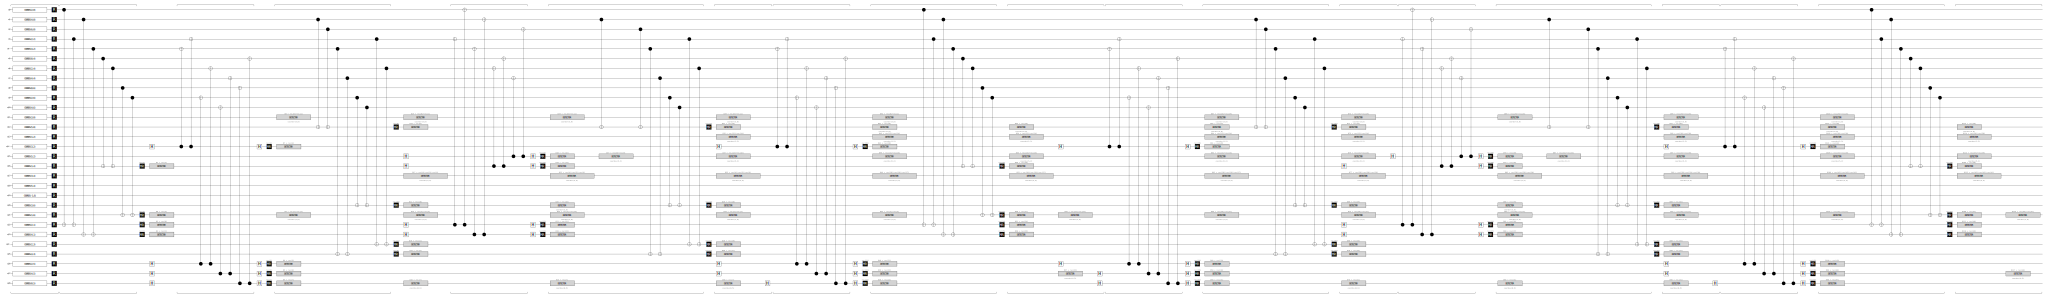

In [22]:
circuit.diagram("timeline-svg")

In [23]:
diagram = circuit.diagram("timeline-svg")
with open("circuit_timeline.svg", "w") as f:
    f.write(str(diagram))

# SVGからPDFに変換
import cairosvg
cairosvg.svg2pdf(url="circuit_timeline.svg", write_to="circuit_timeline.pdf")

In [24]:
diagram = circuit.diagram("detslice-svg")
with open("circuit_detslice.svg", "w") as f:
    f.write(str(diagram))

# SVGからPDFに変換
import cairosvg
cairosvg.svg2pdf(url="circuit_detslice.svg", write_to="circuit_detslice.pdf")

In [25]:
diagram = circuit.diagram("detslice-with-ops-svg",tick=range(0, 100))
with open("circuit_detslice-with-ops.svg", "w") as f:
    f.write(str(diagram))

# SVGからPDFに変換
import cairosvg
cairosvg.svg2pdf(url="circuit_detslice-with-ops.svg", write_to="circuit_detslice-with-ops.pdf")

In [26]:
diagram = circuit.diagram("timeslice-svg",tick=range(0, 100))
with open("circuit_timeslice.svg", "w") as f:
    f.write(str(diagram))

# SVGからPDFに変換
import cairosvg
cairosvg.svg2pdf(url="circuit_timeslice.svg", write_to="circuit_timeslice.pdf")